In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Gradientenverfahren 1D

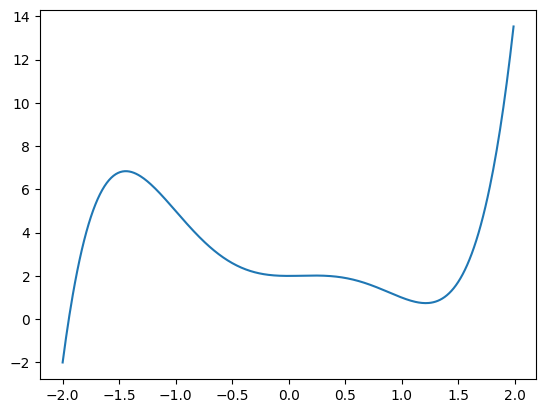

1.2124753150649386 126.75246849350606
1.2124753150649386 0


In [61]:
# Funktion definieren
def fn1d(x) -> float:
    return x**5 - 3 * x**3 + x**2 + 2


# TODO: Visualize fn in [-2, 2]
xmin = -2
xmax = 2
vals = [fn1d(x) for x in np.arange(xmin, xmax, 0.01)]
fig, ax = plt.subplots(1, 1)
ax.plot(np.arange(xmin, xmax, 0.01), vals)
plt.show()
plt.close()


# Händisch Ableitung bestimmen
def fn1d_prime(x) -> float:
    return 5 * x**4 - 9 * x**2 + 2 * x


# Lokales Minimum finden mit Gradientenverfahren
x = 2  # Startpunkt
lr = 1e-2  # Schrittgröße (aka. Learning Rate)
grad_diff = fn1d_prime(x)
change = True
while change is True:
    for i in range(100):
        if np.absolute(grad_diff / (i + 1)) >= 0.005:
            change = True
            grad = fn1d_prime(x)
            grad_diff += grad
            x = x - lr * grad  # optimize
        else:
            change = False
        # Plot fn mit x
    print(x, grad_diff)
    grad_diff = 0

# Gradientenverfahren 2D

In [ ]:
# Funktion definieren
def fn2d(x, y) -> float:
    np.sqrt(x**2 + y**2)


# Ableitung
def fn2d_prime(x, y) -> np.ndarray:  # gibt 2D Array zurück
    partial_x = 2 * x  # leite f nach x ab, lass y konstant
    partial_y = 2 * y  # leite f nach y ab, lass x konstant
    return partial_x, partial_y


# ... siehe oben